<a href="https://colab.research.google.com/github/Jegge2003/GoogleCollabTrials/blob/main/cnn_flower_image_classification_data_augmentations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 style='color:blue' align='center'>Data Augmentation To Address Overfitting In Flower Classification CNN</h2>

**In this notebook we will build a CNN to classify flower images. We will also see how our model overfits and how overfitting can be addressed using data augmentation. Data augmentation is a process of generating new training samples from current training dataset using transformations such as zoom, rotations, change in contrast etc**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Downloading flowers dataset from google website and store it locally. In below call it downloads the zip file (.tgz) in cache_dir which is . meaning the current folder

<h3 style='color:purple'>Load flowers dataset</h3>

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228827136/228813984 [==============================] - 2s 0us/step


In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
#Converting path to Posix path object and allows for easy calls of data
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
#Listing the first 5 PosixPaths
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/roses/4248222578_b4d5868b32.jpg'),
 PosixPath('datasets/flower_photos/roses/8742493689_fb852f0228_n.jpg'),
 PosixPath('datasets/flower_photos/roses/12240165555_98625b1e88_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2197754124_5c8a146761_n.jpg'),
 PosixPath('datasets/flower_photos/roses/180613732_3a7aba0b80_n.jpg')]

In [6]:
#Length of all pictures
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [7]:
#Making a list for all roses
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/4248222578_b4d5868b32.jpg'),
 PosixPath('datasets/flower_photos/roses/8742493689_fb852f0228_n.jpg'),
 PosixPath('datasets/flower_photos/roses/12240165555_98625b1e88_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2197754124_5c8a146761_n.jpg'),
 PosixPath('datasets/flower_photos/roses/180613732_3a7aba0b80_n.jpg')]

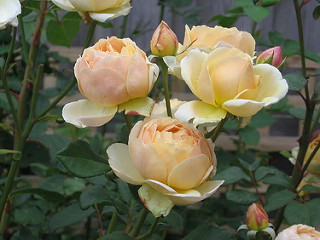

In [8]:
#Using Pillow to display the second rose picture
PIL.Image.open(str(roses[1]))

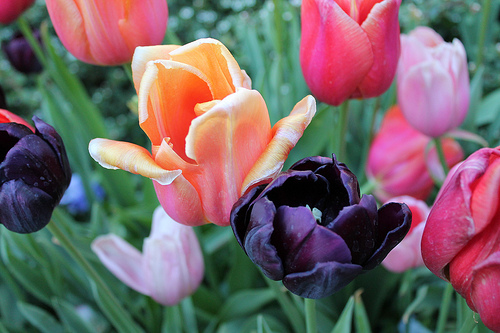

In [9]:
#Making a list for all tulips and using pillow to display the first tulip picture
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

<h3 style='color:purple'>Read flowers images from disk into numpy array using opencv</h3>

In [11]:
#Creating a dictionary of flower lists
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [12]:
#Labelling the flowers numerically
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [13]:
#Listing first 5 paths of roses
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/4248222578_b4d5868b32.jpg'),
 PosixPath('datasets/flower_photos/roses/8742493689_fb852f0228_n.jpg'),
 PosixPath('datasets/flower_photos/roses/12240165555_98625b1e88_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2197754124_5c8a146761_n.jpg'),
 PosixPath('datasets/flower_photos/roses/180613732_3a7aba0b80_n.jpg')]

In [14]:
#Converting to string
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/4248222578_b4d5868b32.jpg'

In [15]:
#Reading to open CV object and gives a numpy array in the end
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [16]:
#Finding the image shape
img.shape

(264, 500, 3)

In [17]:
#Resizing the image
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [18]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [19]:
X = np.array(X)
y = np.array(y)

<h3 style='color:purple'>Train test split</h3>

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

<h3 style='color:purple'>Preprocessing: scale images</h3>

In [21]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

<h3 style='color:purple'>Build convolutional neural network and train it</h3>

In [22]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)              

Epoch 1/30
86/86 [==============================] - 82s 946ms/step - loss: 1.3105 - accuracy: 0.4419
Epoch 2/30
86/86 [==============================] - 81s 943ms/step - loss: 0.9804 - accuracy: 0.6195
Epoch 3/30
86/86 [==============================] - 82s 953ms/step - loss: 0.7882 - accuracy: 0.6977
Epoch 4/30
86/86 [==============================] - 81s 939ms/step - loss: 0.5871 - accuracy: 0.7845
Epoch 5/30
86/86 [==============================] - 80s 936ms/step - loss: 0.3609 - accuracy: 0.8746
Epoch 6/30
86/86 [==============================] - 81s 938ms/step - loss: 0.2205 - accuracy: 0.9248
Epoch 7/30
86/86 [==============================] - 81s 941ms/step - loss: 0.1329 - accuracy: 0.9611
Epoch 8/30
86/86 [==============================] - 80s 935ms/step - loss: 0.0904 - accuracy: 0.9709
Epoch 9/30
86/86 [==============================] - 81s 941ms/step - loss: 0.0664 - accuracy: 0.9800
Epoch 10/30
86/86 [==============================] - 81s 939ms/step - loss: 0.0407 - accura

In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 0s 5ms/step - loss: 2.4165 - accuracy: 0.6699


[2.4165186882019043, 0.6699346303939819]

**Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (66.99%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting**

In [ ]:
predictions = model.predict(X_test_scaled)
predictions

array([[  5.5538044 ,  28.357603  ,  -2.64333   , -17.732698  ,
         -8.868293  ],
       [  7.971043  ,   7.614807  , -11.15702   ,  -9.508243  ,
          2.866003  ],
       [  0.12697598,   3.7088952 ,  13.012845  , -17.065691  ,
         -1.0256854 ],
       ...,
       [ -1.2454829 ,  -6.018974  ,  -9.245011  ,   6.1912336 ,
          3.9217234 ],
       [ -0.2303026 ,  -0.22910628,  -7.751635  ,   6.4317822 ,
          4.1837516 ],
       [  0.5132807 , -20.254309  ,  -1.2567687 ,   7.799835  ,
          3.5779328 ]], dtype=float32)

In [ ]:
score = tf.nn.softmax(predictions[0])

In [ ]:
np.argmax(score)

1

In [ ]:
y_test[0]

1

<h3 style='color:purple'>Improve Test Accuracy Using Data Augmentation</h3>

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

**Original Image**

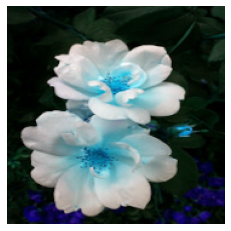

In [ ]:
plt.axis('off')
plt.imshow(X[0])

**Newly generated training sample using data augmentation**

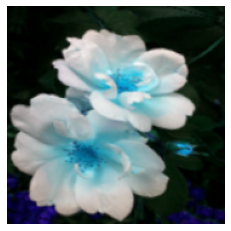

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

<h3 style='color:purple'>Train the model using data augmentation and a drop out layer</h3>

In [ ]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)    

Epoch 1/30
86/86 [==============================] - 1s 17ms/step - loss: 1.4347 - accuracy: 0.3844
Epoch 2/30
86/86 [==============================] - 1s 16ms/step - loss: 1.0742 - accuracy: 0.5789
Epoch 3/30
86/86 [==============================] - 1s 15ms/step - loss: 0.9900 - accuracy: 0.6130
Epoch 4/30
86/86 [==============================] - 1s 13ms/step - loss: 0.9247 - accuracy: 0.6421
Epoch 5/30
86/86 [==============================] - 1s 14ms/step - loss: 0.8485 - accuracy: 0.6722
Epoch 6/30
86/86 [==============================] - 1s 16ms/step - loss: 0.8226 - accuracy: 0.6893
Epoch 7/30
86/86 [==============================] - 1s 14ms/step - loss: 0.7964 - accuracy: 0.6944
Epoch 8/30
86/86 [==============================] - 1s 15ms/step - loss: 0.7662 - accuracy: 0.7140
Epoch 9/30
86/86 [==============================] - 1s 16ms/step - loss: 0.7292 - accuracy: 0.7249
Epoch 10/30
86/86 [==============================] - 2s 18ms/step - loss: 0.6941 - accuracy: 0.7362
Epoch 11/

In [23]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 8s 265ms/step - loss: 3.0505 - accuracy: 0.6645


[3.0504720211029053, 0.6644880175590515]

**You can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased to 73.74%**